In [1]:
import yfinance as yf

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from __future__ import annotations
import datetime

In [3]:
stock_data = yf.Ticker("TEJASNET.NS")
stock_data = stock_data.history(period = '1y')[['Open']]
MINDT = stock_data.reset_index(drop = True)

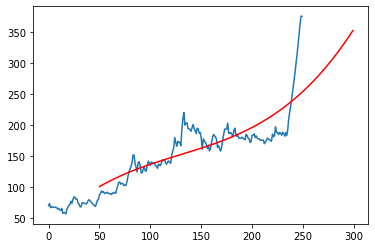

In [4]:
x = MINDT.index
y= MINDT.Open
model = np.polyfit(x,y,3)
predict = np.poly1d(model)
x_pol_reg = range(50,300)
y_pol_reg = predict(x_pol_reg)
plt.plot(x,y)
plt.plot(x_pol_reg, y_pol_reg, c='r')


import yfinance as yf
import pandas as pd
tesla = yf.Ticker('TSLA')
tesla = tesla.history(period="max")
tesla = tesla[['Open']]
nio = yf.Ticker('NIO')
nio = nio.history(period="max")
nio = nio[['Open']]
stonks = tesla.merge(nio, how = 'outer', left_index = True, right_index = True)
stonks.columns = ['TSLA', 'NIO']
stonks

tesla = yf.Ticker('TSLA')

#### MY COLLUMMNS FOR STUDY

tesla = yf.Ticker('TSLA')
tesla=tesla.history(period="max")
tesla = tesla[['Open','Close','Volume']]
tesla

### CHOOSING STOCK LIST

In [36]:
stock_list = ['TSLA','NIO','IQQH.F','BTC-USD','BTC-INR',
              'ETH-USD','LTC-USD','AMZN','TWTR','FB','SQ','PYPL','BRK-A','CSPX.AS','GC=F','SI=F','CL=F','UA','IT','INR=X',
              'EURINR=X','^CNXIT','HAPPSTMNDS.NS','MPHASIS.NS','WIPRO.NS','MINDTREE.NS','INFY.NS','COFORGE.NS','HCLTECH.NS',
              'TCS.NS','TECHM.NS','ASHOKLEY.NS','BOSCHLTD.NS','MARUTI.NS','TATAMOTORS.NS','ESCORTS.NS','BAJAJ-AUTO.NS',
              'EXIDEIND.NS','AMARAJABAT.NS','BALKRISIND.NS','MRF.NS','NATIONALUM.NS','NMDC.NS','COALINDIA.NS',
              'VEDL.NS','TATASTEEL.NS','JINDALSTEL.NS','TATASTEEL.NS','JSWSTEEL.NS','SAIL.NS']

###### HALF DONE LIST 

In [37]:
stock_names = ['TESLA','NIO','CLEAN_ENERGE_ETF','BIT_COIN','BIT_IND','ETH_USD','LTC_USD','AMAZON','TWITTER','FACEBOOK',
              'SQUARE','PAYPAL','BERKSHR','S&P500','GOLD','SILV','CRUDE','UARMOR','GARTNER','USD_N_RS','EUROINR',
               'NIFTY_IT','HAPPYMIND','MPHASIS','WIPRO','MINDTREE','INFY','COFORGE']

### basic checks

In [38]:
len(stock_names), len(stock_list)

(28, 50)

### DEFINE A COLLECTION AND CLEANING

In [39]:
def collect_clean(lists: list[str]) :
    res=[]
    for stock in lists:
        idx=stock.find(".")
        if idx == -1:
            res.append(stock)
        else:
            res.append(stock[:idx])
    return res
        
       

In [40]:
temp_list = collect_clean(stock_list[len(stock_names):])

In [41]:
stock_names = stock_names+temp_list

In [42]:
len(stock_names), len(stock_list)

(50, 50)

In [43]:
stock_dict = {i:j for i,j in zip(stock_names,stock_list)}

In [44]:
stock_dict

{'TESLA': 'TSLA',
 'NIO': 'NIO',
 'CLEAN_ENERGE_ETF': 'IQQH.F',
 'BIT_COIN': 'BTC-USD',
 'BIT_IND': 'BTC-INR',
 'ETH_USD': 'ETH-USD',
 'LTC_USD': 'LTC-USD',
 'AMAZON': 'AMZN',
 'TWITTER': 'TWTR',
 'FACEBOOK': 'FB',
 'SQUARE': 'SQ',
 'PAYPAL': 'PYPL',
 'BERKSHR': 'BRK-A',
 'S&P500': 'CSPX.AS',
 'GOLD': 'GC=F',
 'SILV': 'SI=F',
 'CRUDE': 'CL=F',
 'UARMOR': 'UA',
 'GARTNER': 'IT',
 'USD_N_RS': 'INR=X',
 'EUROINR': 'EURINR=X',
 'NIFTY_IT': '^CNXIT',
 'HAPPYMIND': 'HAPPSTMNDS.NS',
 'MPHASIS': 'MPHASIS.NS',
 'WIPRO': 'WIPRO.NS',
 'MINDTREE': 'MINDTREE.NS',
 'INFY': 'INFY.NS',
 'COFORGE': 'COFORGE.NS',
 'HCLTECH': 'HCLTECH.NS',
 'TCS': 'TCS.NS',
 'TECHM': 'TECHM.NS',
 'ASHOKLEY': 'ASHOKLEY.NS',
 'BOSCHLTD': 'BOSCHLTD.NS',
 'MARUTI': 'MARUTI.NS',
 'TATAMOTORS': 'TATAMOTORS.NS',
 'ESCORTS': 'ESCORTS.NS',
 'BAJAJ-AUTO': 'BAJAJ-AUTO.NS',
 'EXIDEIND': 'EXIDEIND.NS',
 'AMARAJABAT': 'AMARAJABAT.NS',
 'BALKRISIND': 'BALKRISIND.NS',
 'MRF': 'MRF.NS',
 'NATIONALUM': 'NATIONALUM.NS',
 'NMDC': 'NMDC.NS',

stock_dict.items()

### append to a new DataFrame

In [ ]:
master_df = pd.DataFrame()
for key,val in stock_dict.items():
    df = yf.Ticker(val)
    df=df.history(period="max")
    df.dropna(inplace=True)
    #df = df[['Open','Close','Volume']]
    #master_df[key+'_Open'] = df['Open']
    master_df[key+'_Close'] = df['Close']
    #master_df[key+'_Volume'] = df['Volume']
    #print(f"{key} is done")

In [55]:
base = datetime.date.today()
date_list = [base - datetime.timedelta(days=x) for x in range(1)]
date_list.sort()
stocks_master_df = pd.DataFrame(index= date_list)

for i in stock_list:
    i = yf.Ticker(i)
    i = i.history(period='max')
    i= i[['Close']]
    stocks_master_df = stocks_master_df.merge(i, how = 'outer', left_index = True, right_index=True)
    
stocks_master_df.columns = stock_list

#### quality check

In [57]:
stocks_master_df = stocks_master_df[~stocks_master_df.index.duplicated()]

In [79]:
stocks_master_df[stocks_master_df.index.duplicated()]

,TSLA,NIO,IQQH.F,BTC-USD,BTC-INR,ETH-USD,LTC-USD,AMZN,TWTR,FB,...,MRF.NS,NATIONALUM.NS,NMDC.NS,COALINDIA.NS,VEDL.NS,TATASTEEL.NS,JINDALSTEL.NS,TATASTEEL.NS,JSWSTEEL.NS,SAIL.NS


#### Remove Nan values for generated during weekend

In [59]:
stocks_master_df = stocks_master_df[stocks_master_df['TSLA'].notna()]

In [80]:
#stocks_master_df.describe()
stocks_master_df.tail()


,TSLA,NIO,IQQH.F,BTC-USD,BTC-INR,ETH-USD,LTC-USD,AMZN,TWTR,FB,...,MRF.NS,NATIONALUM.NS,NMDC.NS,COALINDIA.NS,VEDL.NS,TATASTEEL.NS,JINDALSTEL.NS,TATASTEEL.NS,JSWSTEEL.NS,SAIL.NS
2795,0.808553,0.719766,0.626693,0.642578,0.603347,0.678194,0.378168,0.901894,0.868752,0.971003,...,0.811423,1.000000,0.848574,0.243568,0.955280,0.990775,0.542324,0.990775,1.000000,0.710019
2796,0.790904,0.691157,0.628047,0.673323,0.637736,0.693455,0.389770,0.893323,0.838730,0.972521,...,0.805916,0.970371,0.837333,0.247101,0.963443,0.977131,0.537002,0.977131,0.991841,0.698182
2797,0.807564,0.713427,NaN,0.729365,0.699921,0.759889,0.439515,0.892475,0.833071,0.967178,...,0.815658,0.829015,0.811544,0.231614,0.947117,0.964331,0.531826,0.964331,0.978013,0.658343
2798,0.803280,0.697334,NaN,0.717042,0.686409,0.753612,0.436708,0.886626,0.812166,0.965828,...,0.802291,0.774077,0.771538,0.225908,0.930081,0.934659,0.506018,0.934659,0.943167,0.618792
2799,0.800814,0.693270,NaN,0.717178,0.683084,0.759023,0.451262,0.878740,0.808708,0.962537,...,0.788898,0.824077,0.794021,0.235417,1.000000,0.975094,0.536492,0.975094,0.980433,0.662096


## Normalization and standardization

In [50]:
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

## Method #1:  Min max scaler

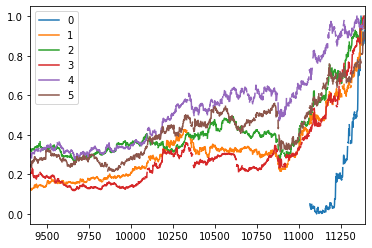

In [23]:
scaler = MinMaxScaler()
pd.DataFrame(scaler.fit_transform(stocks_master_df[['HAPPSTMNDS.NS','MPHASIS.NS','WIPRO.NS','MINDTREE.NS',
'TCS.NS','TECHM.NS']])).tail(2000).plot()

## Method #2 : MaxAbs Scalar

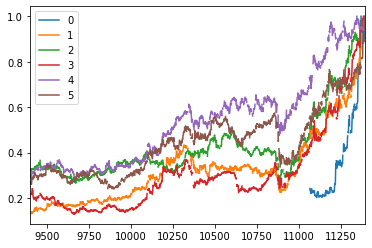

In [24]:
abs_scaler = MaxAbsScaler()
pd.DataFrame(abs_scaler.fit_transform(stocks_master_df[['HAPPSTMNDS.NS','MPHASIS.NS','WIPRO.NS','MINDTREE.NS',
'TCS.NS','TECHM.NS']])).tail(2000).plot()

## Method #3 :  Z-score Method( standardization)

The number of Stddev that a given point is from the mean. It can be usefull but not for this data as it is not normally distributed

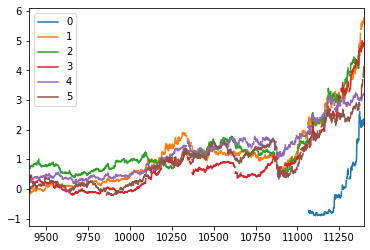

In [25]:
std_scaler =StandardScaler()
pd.DataFrame(std_scaler.fit_transform(stocks_master_df[['HAPPSTMNDS.NS','MPHASIS.NS','WIPRO.NS','MINDTREE.NS',
'TCS.NS','TECHM.NS']])).tail(2000).plot()

## Method #4 Robust Scaler

Not many outliers so not that useful in this data set 

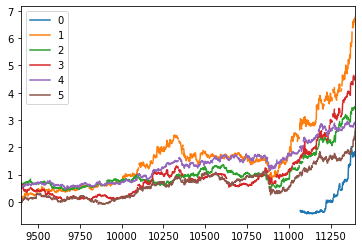

In [28]:
rob_scaler = RobustScaler()
pd.DataFrame(rob_scaler.fit_transform(stocks_master_df[['HAPPSTMNDS.NS','MPHASIS.NS','WIPRO.NS','MINDTREE.NS',
'TCS.NS','TECHM.NS']])).tail(2000).plot()

### Going with min- max normalization

In [64]:
scaler = MinMaxScaler()
stocks_master_df = pd.DataFrame(scaler.fit_transform(stocks_master_df), columns= stocks_master_df.columns)

In [65]:
stocks_master_df

,TSLA,NIO,IQQH.F,BTC-USD,BTC-INR,ETH-USD,LTC-USD,AMZN,TWTR,FB,...,MRF.NS,NATIONALUM.NS,NMDC.NS,COALINDIA.NS,VEDL.NS,TATASTEEL.NS,JINDALSTEL.NS,TATASTEEL.NS,JSWSTEEL.NS,SAIL.NS
0,0.001839,NaN,0.314475,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,...,0.023534,0.600200,0.617014,NaN,0.632620,0.146349,0.813275,0.146349,0.066844,0.822361
1,0.001825,NaN,0.308456,NaN,NaN,NaN,NaN,0.000179,NaN,NaN,...,0.023312,0.593643,0.613955,NaN,0.625677,0.148599,0.818009,0.148599,0.068230,0.821388
2,0.001400,NaN,0.290400,NaN,NaN,NaN,NaN,0.000649,NaN,NaN,...,0.022798,0.601770,0.614314,NaN,0.623363,0.142682,0.802229,0.142682,0.065371,0.804606
3,0.000773,NaN,0.306952,NaN,NaN,NaN,NaN,0.000146,NaN,NaN,...,0.024586,0.600292,0.604415,NaN,0.620138,0.142654,0.804668,0.142654,0.064538,0.808498
4,0.000070,NaN,0.325008,NaN,NaN,NaN,NaN,0.000400,NaN,NaN,...,0.024303,0.592628,0.606035,NaN,0.642939,0.145682,0.826043,0.145682,0.069914,0.826252
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2795,0.808553,0.719766,0.626693,0.642578,0.603347,0.678194,0.378168,0.901894,0.868752,0.971003,...,0.811423,1.000000,0.848574,0.243568,0.955280,0.990775,0.542324,0.990775,1.000000,0.710019
2796,0.790904,0.691157,0.628047,0.673323,0.637736,0.693455,0.389770,0.893323,0.838730,0.972521,...,0.805916,0.970371,0.837333,0.247101,0.963443,0.977131,0.537002,0.977131,0.991841,0.698182
2797,0.807564,0.713427,NaN,0.729365,0.699921,0.759889,0.439515,0.892475,0.833071,0.967178,...,0.815658,0.829015,0.811544,0.231614,0.947117,0.964331,0.531826,0.964331,0.978013,0.658343
2798,0.803280,0.697334,NaN,0.717042,0.686409,0.753612,0.436708,0.886626,0.812166,0.965828,...,0.802291,0.774077,0.771538,0.225908,0.930081,0.934659,0.506018,0.934659,0.943167,0.618792


# Correlation

There are 4 basic correlation methods
1. CoVariance ( for normally distributed data)
2. Pearsons's -> Thats similar for normal distributions as the std correlation coefficient
3. Searman's 
4. Kendall

In [66]:
stocks_master_df.tail(1000)

,TSLA,NIO,IQQH.F,BTC-USD,BTC-INR,ETH-USD,LTC-USD,AMZN,TWTR,FB,...,MRF.NS,NATIONALUM.NS,NMDC.NS,COALINDIA.NS,VEDL.NS,TATASTEEL.NS,JINDALSTEL.NS,TATASTEEL.NS,JSWSTEEL.NS,SAIL.NS
1800,0.073995,NaN,0.123383,0.061941,NaN,0.075415,0.121122,0.236913,0.041182,0.427254,...,0.621017,0.458974,0.291664,0.429082,0.625238,0.292983,0.110229,0.292983,0.237015,0.212985
1801,0.076590,NaN,0.122630,0.062746,NaN,0.076071,0.138455,0.234457,0.046369,0.424638,...,0.623739,0.460377,0.297902,0.431314,0.642600,0.303011,0.116207,0.303011,0.246849,0.223613
1802,0.076627,NaN,0.123383,0.065638,NaN,0.078012,0.130315,0.232925,0.045269,0.421910,...,0.626392,0.459442,0.293223,0.432125,0.639817,0.305953,0.119196,0.305953,0.254792,0.223334
1803,0.075517,NaN,0.121125,0.066221,NaN,0.079525,0.132949,0.230940,0.041496,0.417916,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1804,0.074974,NaN,0.118869,0.066396,NaN,0.083323,0.162662,0.231150,0.043383,0.420503,...,0.623796,0.458038,0.294263,0.441456,0.647239,0.303847,0.120217,0.303847,0.252837,0.228089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2795,0.808553,0.719766,0.626693,0.642578,0.603347,0.678194,0.378168,0.901894,0.868752,0.971003,...,0.811423,1.000000,0.848574,0.243568,0.955280,0.990775,0.542324,0.990775,1.000000,0.710019
2796,0.790904,0.691157,0.628047,0.673323,0.637736,0.693455,0.389770,0.893323,0.838730,0.972521,...,0.805916,0.970371,0.837333,0.247101,0.963443,0.977131,0.537002,0.977131,0.991841,0.698182
2797,0.807564,0.713427,NaN,0.729365,0.699921,0.759889,0.439515,0.892475,0.833071,0.967178,...,0.815658,0.829015,0.811544,0.231614,0.947117,0.964331,0.531826,0.964331,0.978013,0.658343
2798,0.803280,0.697334,NaN,0.717042,0.686409,0.753612,0.436708,0.886626,0.812166,0.965828,...,0.802291,0.774077,0.771538,0.225908,0.930081,0.934659,0.506018,0.934659,0.943167,0.618792


In [67]:
stocks_master_df.tail(1000).corr(method = 'pearson')

,TSLA,NIO,IQQH.F,BTC-USD,BTC-INR,ETH-USD,LTC-USD,AMZN,TWTR,FB,...,MRF.NS,NATIONALUM.NS,NMDC.NS,COALINDIA.NS,VEDL.NS,TATASTEEL.NS,JINDALSTEL.NS,TATASTEEL.NS,JSWSTEEL.NS,SAIL.NS
TSLA,1.000000,0.960292,0.970995,0.866233,0.843085,0.753243,0.443870,0.884403,0.821358,0.886076,...,0.655975,0.173271,0.584730,-0.653951,0.206779,0.593598,0.751237,0.593598,0.709600,0.405932
NIO,0.960292,1.000000,0.950726,0.815069,0.780773,0.756872,0.654887,0.837973,0.835368,0.805714,...,0.859689,0.466016,0.624614,-0.462892,0.572195,0.703338,0.831851,0.703338,0.727826,0.636537
IQQH.F,0.970995,0.950726,1.000000,0.820607,0.777331,0.660425,0.381090,0.871739,0.812659,0.857952,...,0.594643,0.038941,0.502925,-0.687399,0.073903,0.479346,0.651409,0.479346,0.616578,0.267678
BTC-USD,0.866233,0.815069,0.820607,1.000000,0.999795,0.890069,0.711133,0.696727,0.828291,0.776130,...,0.701292,0.371997,0.726652,-0.431558,0.424306,0.701631,0.817481,0.701631,0.773142,0.574485
BTC-INR,0.843085,0.780773,0.777331,0.999795,1.000000,0.900090,0.947173,0.644339,0.884999,0.713039,...,0.847128,0.735709,0.735821,-0.000226,0.836592,0.787103,0.888002,0.787103,0.806816,0.787788
ETH-USD,0.753243,0.756872,0.660425,0.890069,0.900090,1.000000,0.776998,0.581590,0.718923,0.752516,...,0.704135,0.611478,0.882740,-0.239929,0.646475,0.877882,0.915848,0.877882,0.893917,0.809028
LTC-USD,0.443870,0.654887,0.381090,0.711133,0.947173,0.776998,1.000000,0.230788,0.448674,0.406330,...,0.572766,0.516312,0.648746,0.075555,0.640952,0.624802,0.709131,0.624802,0.551337,0.678931
AMZN,0.884403,0.837973,0.871739,0.696727,0.644339,0.581590,0.230788,1.000000,0.807368,0.895543,...,0.404676,-0.089493,0.409384,-0.775130,-0.108713,0.376160,0.589523,0.376160,0.593416,0.188790
TWTR,0.821358,0.835368,0.812659,0.828291,0.884999,0.718923,0.448674,0.807368,1.000000,0.811061,...,0.590970,0.221133,0.588800,-0.465278,0.203785,0.585998,0.730166,0.585998,0.750757,0.441203
FB,0.886076,0.805714,0.857952,0.776130,0.713039,0.752516,0.406330,0.895543,0.811061,1.000000,...,0.516212,0.180586,0.665384,-0.657379,0.189800,0.620031,0.736428,0.620031,0.735663,0.441768


#### Mathematicians recomends spearmans for stock analysis

In [68]:
stocks_master_df.tail(1000).corr(method = 'spearman')

,TSLA,NIO,IQQH.F,BTC-USD,BTC-INR,ETH-USD,LTC-USD,AMZN,TWTR,FB,...,MRF.NS,NATIONALUM.NS,NMDC.NS,COALINDIA.NS,VEDL.NS,TATASTEEL.NS,JINDALSTEL.NS,TATASTEEL.NS,JSWSTEEL.NS,SAIL.NS
TSLA,1.000000,0.791794,0.662400,0.564477,0.917391,0.495847,0.101541,0.646940,0.428003,0.690620,...,0.521364,-0.053200,0.268836,-0.691254,0.019674,0.273034,0.495295,0.273034,0.384395,0.116280
NIO,0.791794,1.000000,0.643669,0.574675,0.863533,0.686326,0.410188,0.686010,0.640500,0.631973,...,0.655231,0.381977,0.410093,-0.401693,0.456400,0.662793,0.842512,0.662793,0.780117,0.598710
IQQH.F,0.662400,0.643669,1.000000,0.731071,0.902035,0.337973,0.211098,0.819386,0.712451,0.849018,...,0.216246,-0.320727,0.196192,-0.790541,-0.256240,-0.004155,0.304591,-0.004155,0.234581,-0.183361
BTC-USD,0.564477,0.574675,0.731071,1.000000,0.997104,0.733536,0.635319,0.647983,0.636606,0.810589,...,0.448274,0.015182,0.465022,-0.495672,0.103093,0.316153,0.544202,0.316153,0.346952,0.210077
BTC-INR,0.917391,0.863533,0.902035,0.997104,1.000000,0.965154,0.859935,0.819964,0.895263,0.874221,...,0.723526,0.620849,0.633212,-0.161832,0.660090,0.776424,0.899271,0.776424,0.841123,0.750802
ETH-USD,0.495847,0.686326,0.337973,0.733536,0.965154,1.000000,0.808321,0.325479,0.454350,0.580280,...,0.713127,0.494937,0.636185,-0.052979,0.591554,0.715082,0.815718,0.715082,0.577374,0.677393
LTC-USD,0.101541,0.410188,0.211098,0.635319,0.859935,0.808321,1.000000,0.138872,0.411946,0.376512,...,0.554113,0.537936,0.720114,0.220668,0.624447,0.695538,0.686278,0.695538,0.489110,0.693769
AMZN,0.646940,0.686010,0.819386,0.647983,0.819964,0.325479,0.138872,1.000000,0.741831,0.796328,...,0.200038,-0.297325,0.094467,-0.720070,-0.274755,-0.002051,0.377190,-0.002051,0.408495,-0.103273
TWTR,0.428003,0.640500,0.712451,0.636606,0.895263,0.454350,0.411946,0.741831,1.000000,0.732767,...,0.361282,-0.050222,0.208877,-0.435339,-0.000586,0.195996,0.508209,0.195996,0.573793,0.140106
FB,0.690620,0.631973,0.849018,0.810589,0.874221,0.580280,0.376512,0.796328,0.732767,1.000000,...,0.368230,-0.143640,0.333020,-0.643134,-0.066519,0.164792,0.487527,0.164792,0.349597,0.071827


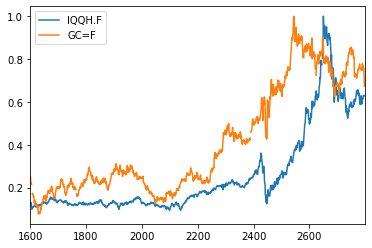

In [69]:
stocks_master_df[['IQQH.F','GC=F']].tail(1200).plot()

### correlation plotting  on seaborn

In [70]:
import seaborn as sns

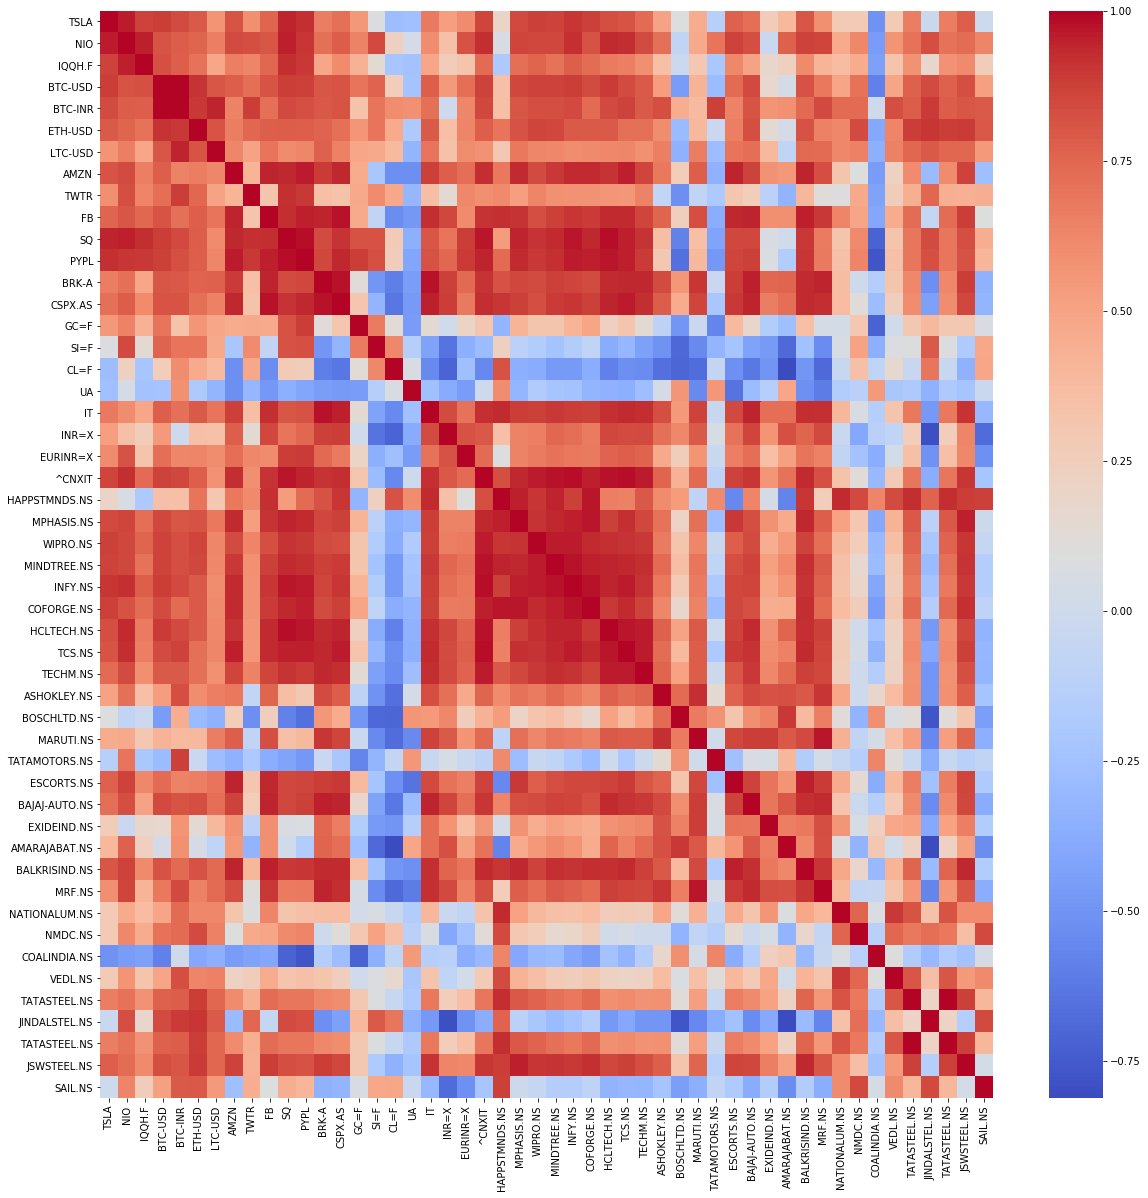

In [81]:
plt.figure(figsize=(20,20))
sns.heatmap(stocks_master_df.corr(),cmap='coolwarm')

### Plotting  higger correlations

In [82]:
corr_matrix = stocks_master_df.corr(method='pearson').abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
corr_cols = [column for column in upper.columns if any(upper[column] > 0.95)]


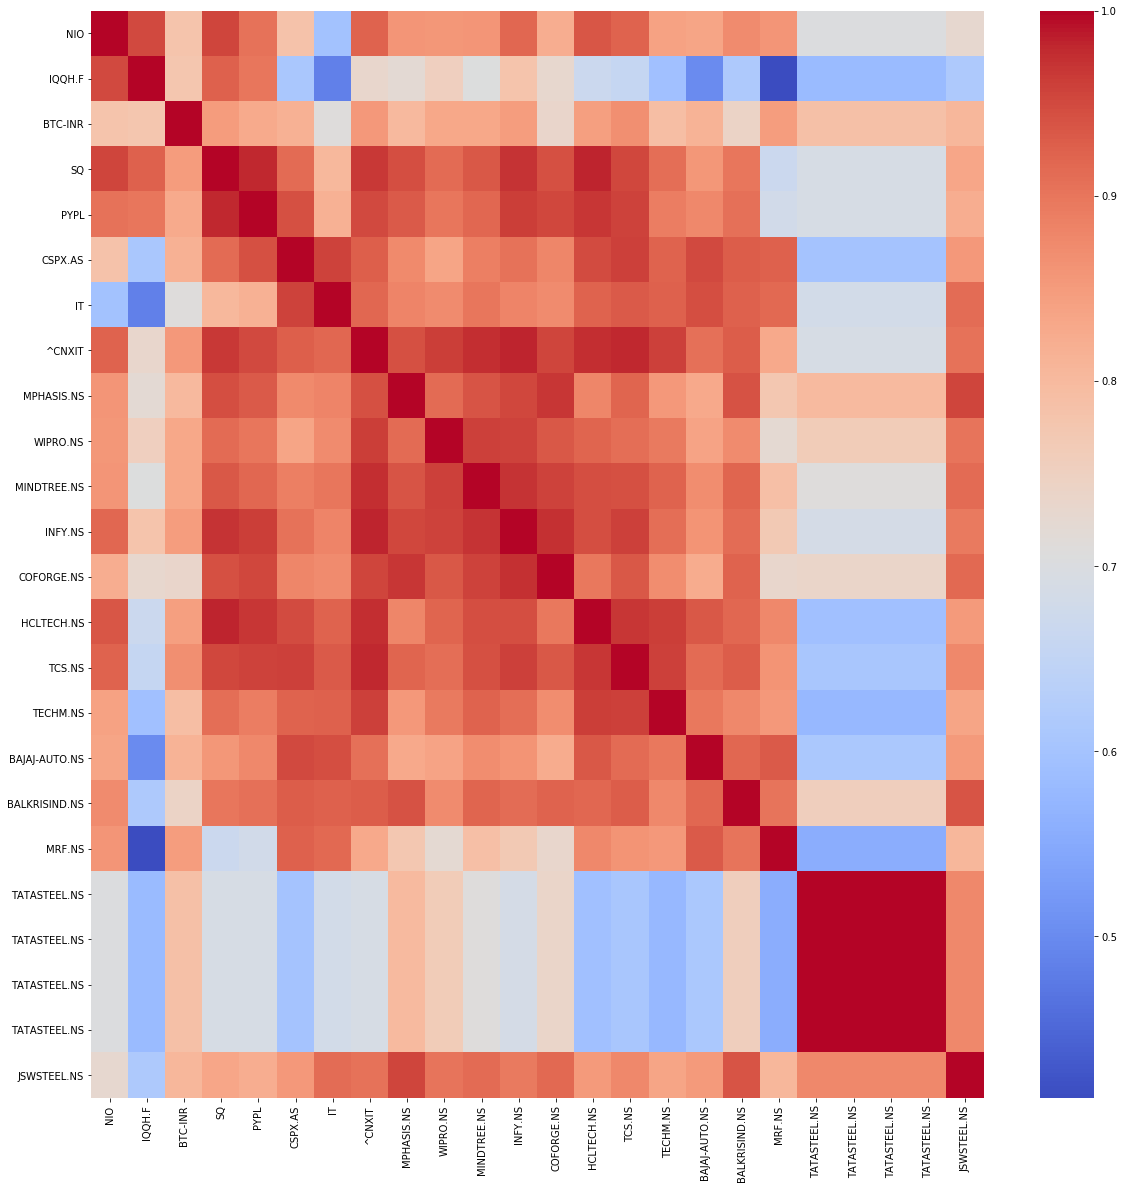

In [83]:
plt.figure(figsize=(20,20))
sns.heatmap(stocks_master_df[corr_cols].corr(),cmap='coolwarm')

In [77]:
corr_matrix = stocks_master_df.corr(method='spearman').abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
corr_cols = [column for column in upper.columns if any(upper[column] > 0.95)]


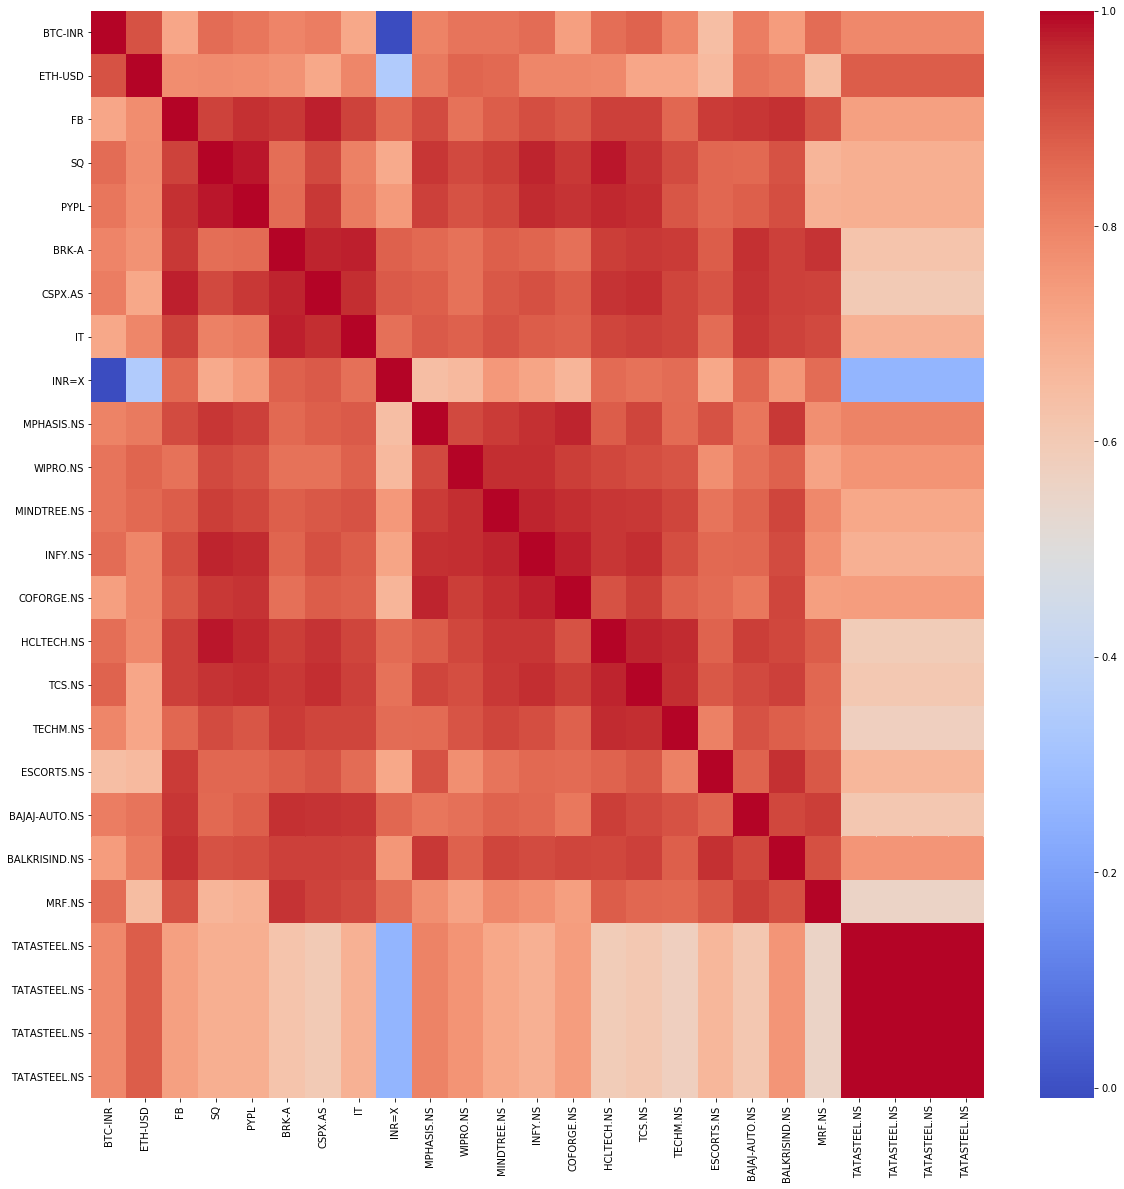

In [78]:
plt.figure(figsize=(20,20))
sns.heatmap(stocks_master_df[corr_cols].corr(),cmap='coolwarm')

In [84]:
stocks_master_df.tail()

,TSLA,NIO,IQQH.F,BTC-USD,BTC-INR,ETH-USD,LTC-USD,AMZN,TWTR,FB,...,MRF.NS,NATIONALUM.NS,NMDC.NS,COALINDIA.NS,VEDL.NS,TATASTEEL.NS,JINDALSTEL.NS,TATASTEEL.NS,JSWSTEEL.NS,SAIL.NS
2795,0.808553,0.719766,0.626693,0.642578,0.603347,0.678194,0.378168,0.901894,0.868752,0.971003,...,0.811423,1.000000,0.848574,0.243568,0.955280,0.990775,0.542324,0.990775,1.000000,0.710019
2796,0.790904,0.691157,0.628047,0.673323,0.637736,0.693455,0.389770,0.893323,0.838730,0.972521,...,0.805916,0.970371,0.837333,0.247101,0.963443,0.977131,0.537002,0.977131,0.991841,0.698182
2797,0.807564,0.713427,NaN,0.729365,0.699921,0.759889,0.439515,0.892475,0.833071,0.967178,...,0.815658,0.829015,0.811544,0.231614,0.947117,0.964331,0.531826,0.964331,0.978013,0.658343
2798,0.803280,0.697334,NaN,0.717042,0.686409,0.753612,0.436708,0.886626,0.812166,0.965828,...,0.802291,0.774077,0.771538,0.225908,0.930081,0.934659,0.506018,0.934659,0.943167,0.618792
2799,0.800814,0.693270,NaN,0.717178,0.683084,0.759023,0.451262,0.878740,0.808708,0.962537,...,0.788898,0.824077,0.794021,0.235417,1.000000,0.975094,0.536492,0.975094,0.980433,0.662096
